In [1]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
camera_left = cv2.VideoCapture(0)
camera_right = cv2.VideoCapture(1)

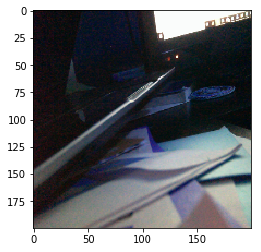

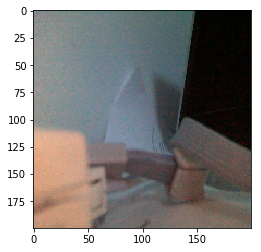

(200, 200, 3)
(200, 200, 3)
(200, 200, 3)
(200, 200, 3)


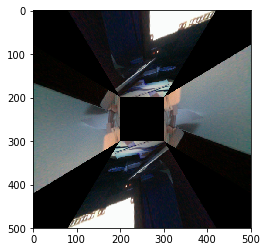

In [34]:
def transform_image(img, size = 500, offset = 50, boundary = 80, square = 200):
    rows,cols,ch = img.shape
    print(img.shape)

    pts1 = np.float32([[0,rows],[cols,rows],[0,0],[cols,0]])
    pts2 = np.float32([[size/2 - offset,square],[size/2 + offset,square],[boundary,0],[size - boundary,0]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img, M, (size,size))

    return dst
def make_stitch(img1, img2, img3, img4):
    img1 = transform_image(img1)
    img2 = np.rot90(transform_image(img2))
    img3 = np.rot90(transform_image(img3), 2)
    img4 = np.rot90(transform_image(img4), 3)
    img5 = img1+img2+img3+img4
    plt.imshow(img5)
    plt.show()



left = cv2.resize(camera_left.read()[1], (200,200))
right = cv2.resize(camera_right.read()[1], (200,200))
plt.imshow(left)
plt.show()
plt.imshow(right)
plt.show()
org = cv2.resize(cv2.imread('1.png', cv2.IMREAD_UNCHANGED), (200,200))
make_stitch(left, right, left, right)